# Matplotlib

# Task 1

In [3]:
#Using historical stock price data for multiple companies, create an interactive plot to analyze trends and patterns over time. 
#Include the following features:
# Line plots for stock prices of three different companies over a year.
# Highlight significant events or anomalies with annotations.
# Add a moving average line to smooth out short-term fluctuations and highlight longer-term trends.

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("GOOGL.csv")
df1=pd.read_csv("AAPL.csv")
df2=pd.read_csv("NVDA.csv")

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,147.511786,149.036984,146.229920,147.705476,147.560985,2.797381e+07
std,18.268475,18.403892,18.159630,18.303449,18.329374,1.060895e+07
min,121.360001,123.000000,120.209999,121.529999,121.390678,1.024210e+07
25%,133.665000,135.535004,132.157505,134.062500,133.908814,2.155822e+07
50%,139.645004,141.595001,138.839996,140.299995,140.139160,2.522480e+07
75%,157.092506,159.322506,156.325001,157.862496,157.681526,3.020142e+07
max,190.309998,191.750000,189.029999,191.179993,191.179993,8.436620e+07


In [5]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,186.324087,187.948254,184.788611,186.396825,185.984207,6.038856e+07
std,14.993327,15.170131,14.712436,14.976953,15.093254,2.465979e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277497,177.052502,173.700004,175.370007,174.801845,4.727445e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502815,5.377700e+07
75%,192.592502,194.017498,191.494999,192.542500,192.067955,6.604168e+07
max,236.479996,237.229996,233.089996,234.820007,234.820007,2.464214e+08


In [6]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,71.405770,72.628873,70.016429,71.399238,71.391223,4.571428e+08
std,29.012734,29.583191,28.250264,28.923183,28.925785,1.531170e+08
min,40.450001,40.879002,39.230000,40.326000,40.317253,1.739110e+08
25%,46.183999,47.015250,45.319750,46.551251,46.543262,3.663902e+08
50%,60.176501,61.057001,59.504000,60.451999,60.444201,4.317830e+08
75%,90.039499,91.325253,88.408751,90.357752,90.350328,5.220410e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.156044e+09


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['month_year'] = df['Date'].dt.to_period('M')
monthly_data = df.groupby('month_year')['Close'].max().reset_index()
monthly_data['month_year'] = monthly_data['month_year'].dt.to_timestamp()

In [8]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['month_year'] = df1['Date'].dt.to_period('M')
monthly_data1 = df1.groupby('month_year')['Close'].max().reset_index()
monthly_data1['month_year'] = monthly_data1['month_year'].dt.to_timestamp()

In [9]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['month_year'] = df2['Date'].dt.to_period('M')
monthly_data2 = df2.groupby('month_year')['Close'].max().reset_index()
monthly_data2['month_year'] = monthly_data2['month_year'].dt.to_timestamp()

In [10]:
monthly_data.tail()

,month_year,Close
8,2024-03-01,150.929993
9,2024-04-01,171.949997
10,2024-05-01,177.850006
11,2024-06-01,185.410004
12,2024-07-01,191.179993


In [11]:
monthly_data2.tail()

,month_year,Close
8,2024-03-01,95.001999
9,2024-04-01,90.615997
10,2024-05-01,114.824997
11,2024-06-01,135.580002
12,2024-07-01,134.910004


In [12]:
monthly_data1.tail()

,month_year,Close
8,2024-03-01,179.660004
9,2024-04-01,176.550003
10,2024-05-01,192.350006
11,2024-06-01,216.669998
12,2024-07-01,234.820007


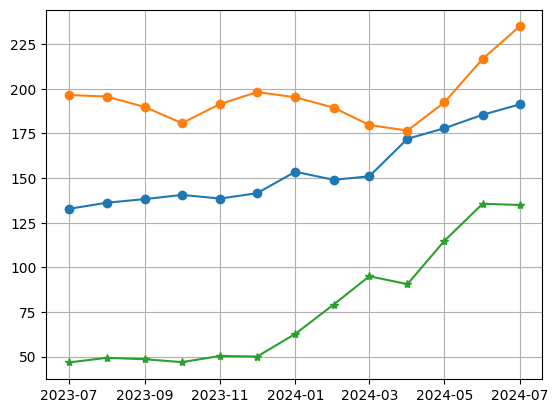

In [13]:
plt.plot(monthly_data['month_year'], monthly_data['Close'], marker='o')
plt.plot(monthly_data1['month_year'], monthly_data1['Close'], marker='o')
plt.plot(monthly_data2['month_year'], monthly_data2['Close'], marker='*')
plt.grid()
plt.show()

# Task 2

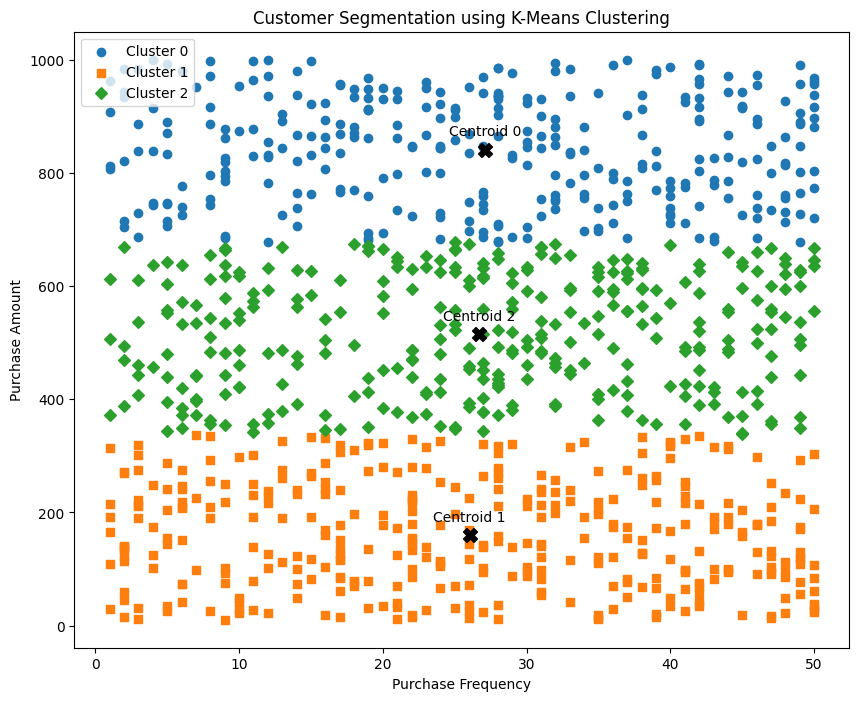

In [14]:
#Visualize the results of a customer segmentation analysis using K-Means clustering. 
#Use a dataset of customer purchase behavior, and create scatter plots to display clusters.
# Include:
# Scatter plots of customers segmented into different clusters based on purchase frequency and amount.
# Distinguish clusters with different colors and markers.
# Annotate centroids of each cluster.


import pandas as pd
file_path = 'customer_segmentation_data.csv'
data = pd.read_csv(file_path)
features = data[['purchase_frequency', 'last_purchase_amount']]
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)
data['Cluster'] = kmeans.labels_

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
markers = ['o', 's', 'D']
for i in range(n_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['purchase_frequency'], cluster_data['last_purchase_amount'],
                label=f'Cluster {i}', marker=markers[i])

centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], s=100, c='black', marker='X')
    plt.annotate(f'Centroid {i}', (centroid[0], centroid[1]), textcoords='offset points', xytext=(0,10), ha='center')

plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Amount')
plt.title('Customer Segmentation using K-Means Clustering')
plt.legend()
plt.show()

# Task 3

In [15]:
# Create a dashboard to visualize sales performance across different regions and product categories.
# Include:
# Bar charts showing total sales per region.
# Stacked bar charts to break down sales by product categories.
# A line plot for monthly sales trends over the past year.

df=pd.read_csv("salesdata.csv",parse_dates=['order_date'])
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

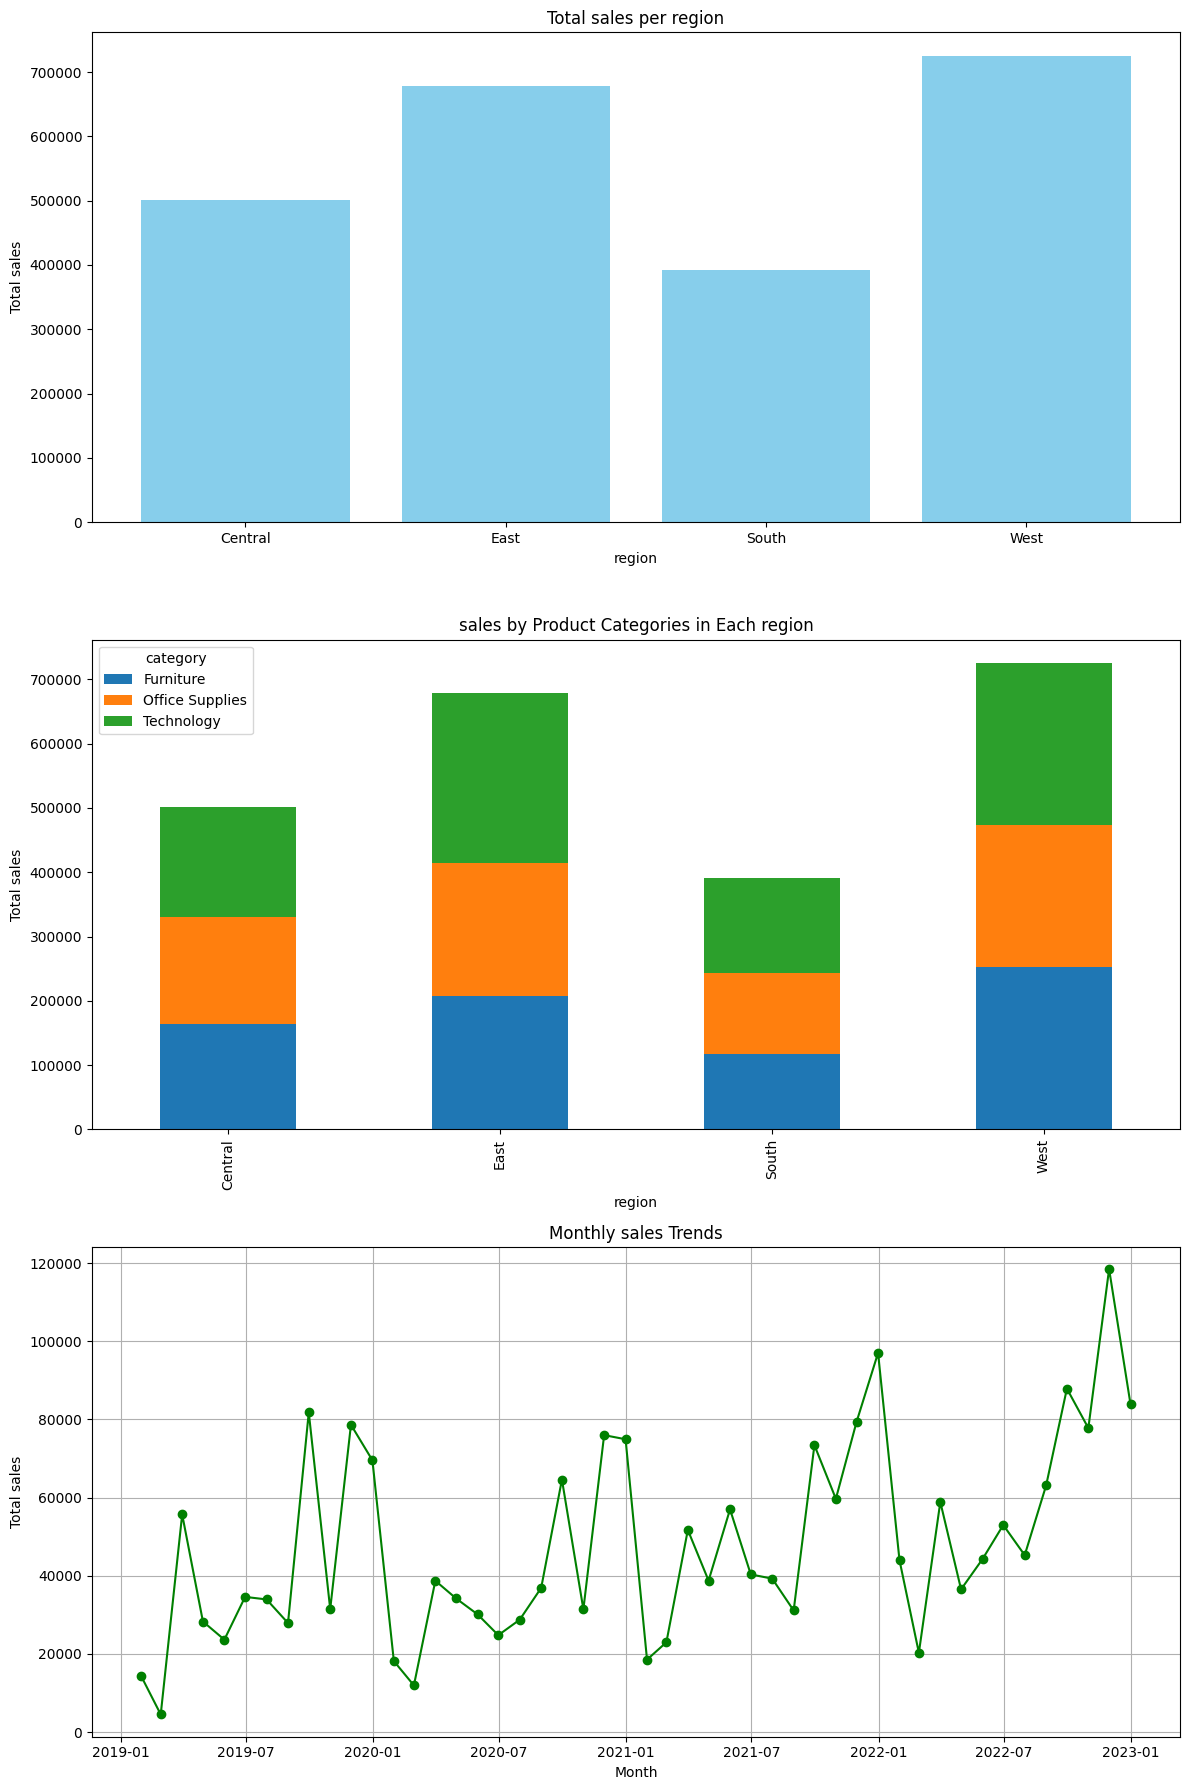

In [16]:
df.columns = [col.strip() for col in df.columns]

total_sales_per_region = df.groupby('region')['sales'].sum()

sales_by_category_region = df.groupby(['region', 'category'])['sales'].sum().unstack()

df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales_trends = df.resample('M', on='order_date')['sales'].sum()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

axes[0].bar(total_sales_per_region.index, total_sales_per_region.values, color='skyblue')
axes[0].set_title('Total sales per region')
axes[0].set_xlabel('region')
axes[0].set_ylabel('Total sales')

sales_by_category_region.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('sales by Product Categories in Each region')
axes[1].set_xlabel('region')
axes[1].set_ylabel('Total sales')
axes[1].legend(title='category')

axes[2].plot(monthly_sales_trends.index, monthly_sales_trends.values, marker='o', linestyle='-', color='green')
axes[2].set_title('Monthly sales Trends')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total sales')
axes[2].grid(True)

plt.tight_layout()

plt.show()

# Task 4

In [17]:
# Analyze and visualize the distribution of real estate prices in different neighborhoods of a city.
# Use a dataset of real estate listings and create:
# A histogram to show the price distribution.
# A box plot to compare price distributions across different neighborhoods.
# Scatter plots to show the relationship between property size and price.

df=pd.read_csv("AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,LotArea,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [18]:
sc=df[['GrLivArea','SalePrice','Neighborhood']]

In [19]:
sc.head()

,GrLivArea,SalePrice,Neighborhood
0,1656,215000,NAmes
1,896,105000,NAmes
2,1329,172000,NAmes
3,2110,244000,NAmes
4,1629,189900,Gilbert


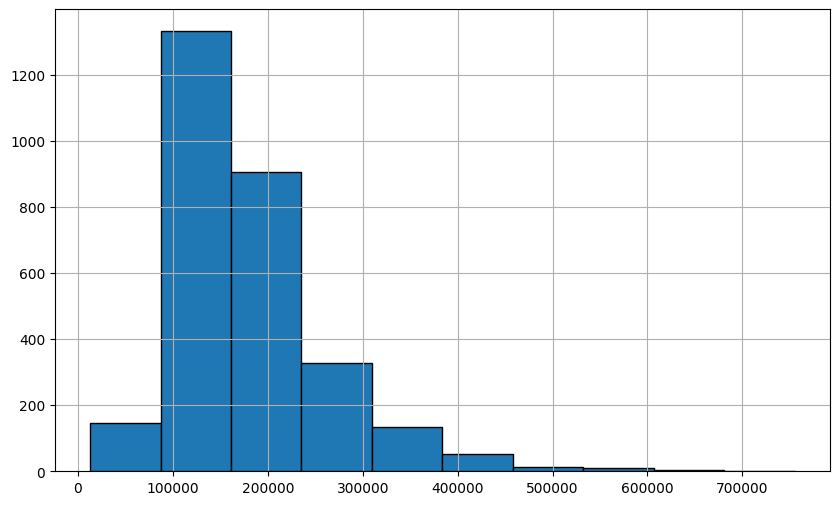

In [20]:
plt.figure(figsize=(10,6))
plt.hist(sc.SalePrice,edgecolor="k")
plt.grid()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'NAmes'),
  Text(1, 0, 'Gilbert'),
  Text(2, 0, 'StoneBr'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Somerst'),
  Text(5, 0, 'BrDale'),
  Text(6, 0, 'NPkVill'),
  Text(7, 0, 'NridgHt'),
  Text(8, 0, 'Blmngtn'),
  Text(9, 0, 'NoRidge'),
  Text(10, 0, 'SawyerW'),
  Text(11, 0, 'Sawyer'),
  Text(12, 0, 'Greens'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'OldTown'),
  Text(15, 0, 'IDOTRR'),
  Text(16, 0, 'ClearCr'),
  Text(17, 0, 'SWISU'),
  Text(18, 0, 'Edwards'),
  Text(19, 0, 'CollgCr'),
  Text(20, 0, 'Crawfor'),
  Text(21, 0, 'Blueste'),
  Text(22, 0, 'Mitchel'),
  Text(23, 0, 'Timber'),
  Text(24, 0, 'MeadowV'),
  Text(25, 0, 'Veenker'),
  Text(26, 0, 'GrnHill'),
  Text(27, 0, 'Landmrk')])

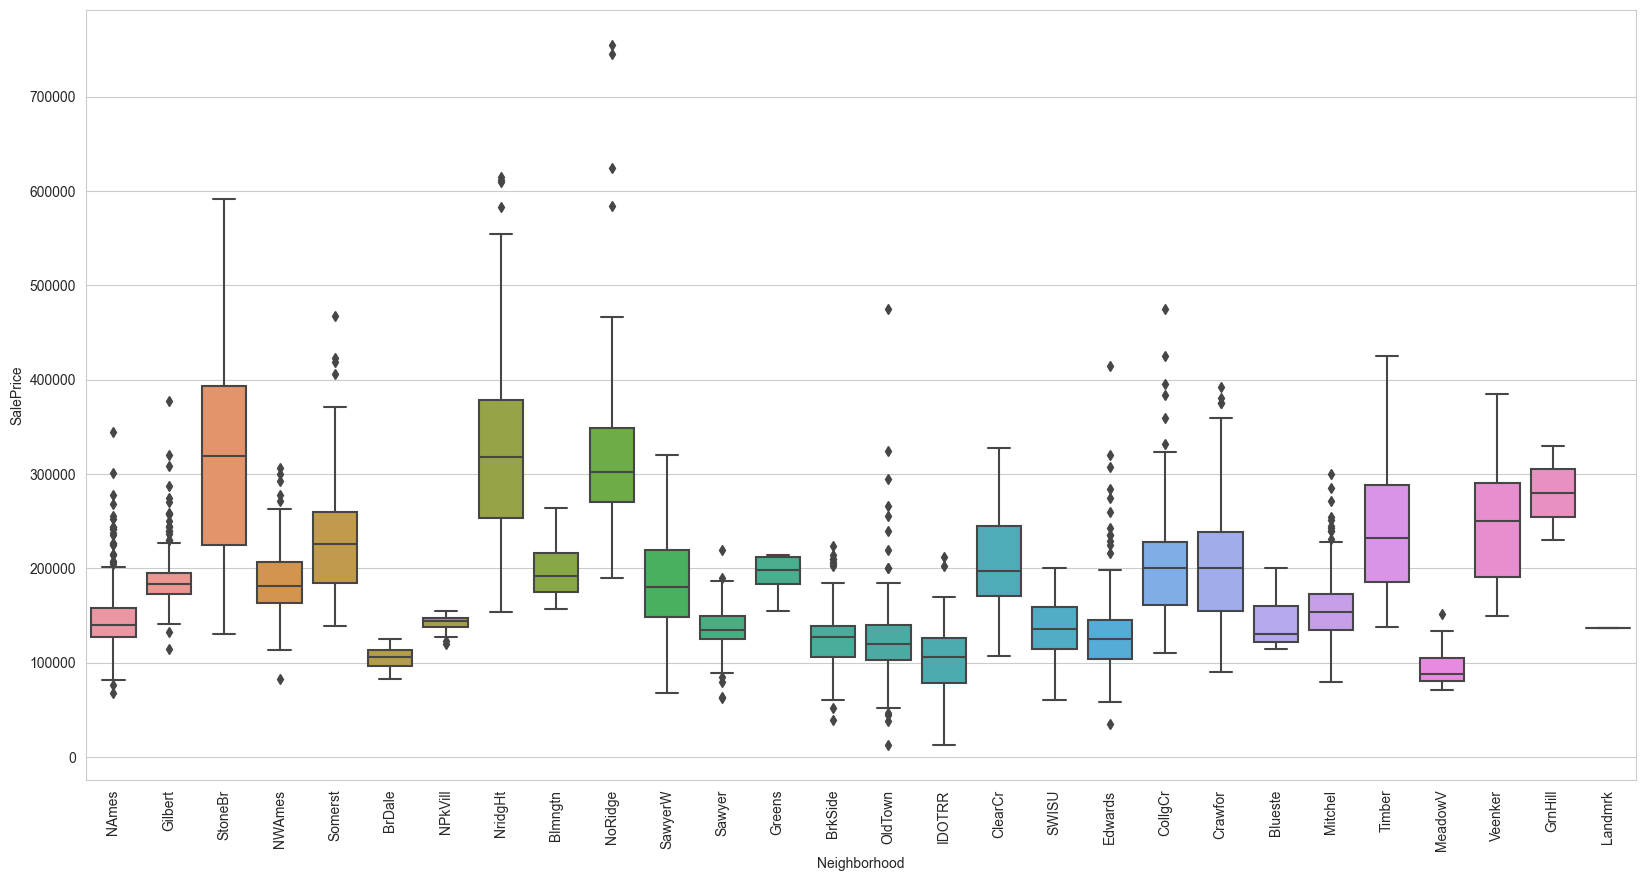

In [36]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.boxplot(y=sc.SalePrice,x=sc.Neighborhood)
plt.xticks(rotation=90)

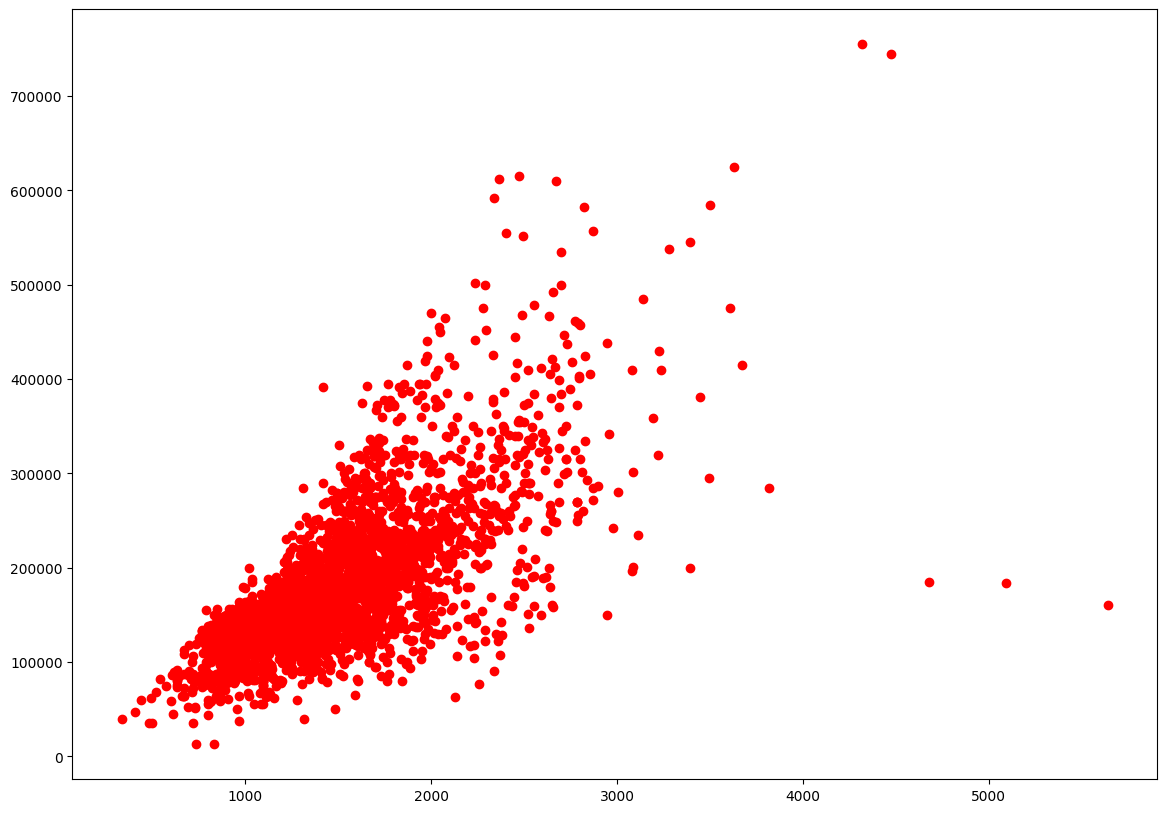

In [22]:
plt.figure(figsize=(14,10))
plt.scatter(sc.GrLivArea,sc.SalePrice,color="r")
plt.show()

# Seaborn

# Task 1

In [37]:
# Project 1: Customer Segmentation Analysis
# Dataset

# Customer data including purchase history, demographics, and behavior metrics. Download a suitable dataset from Kaggle, such as the Mall Customer Segmentation Data.

# Visualization Goals

# Identify distinct customer segments.
# Visualize purchasing patterns across segments.

import pandas as pd

df = pd.read_csv('mall_segmentation.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

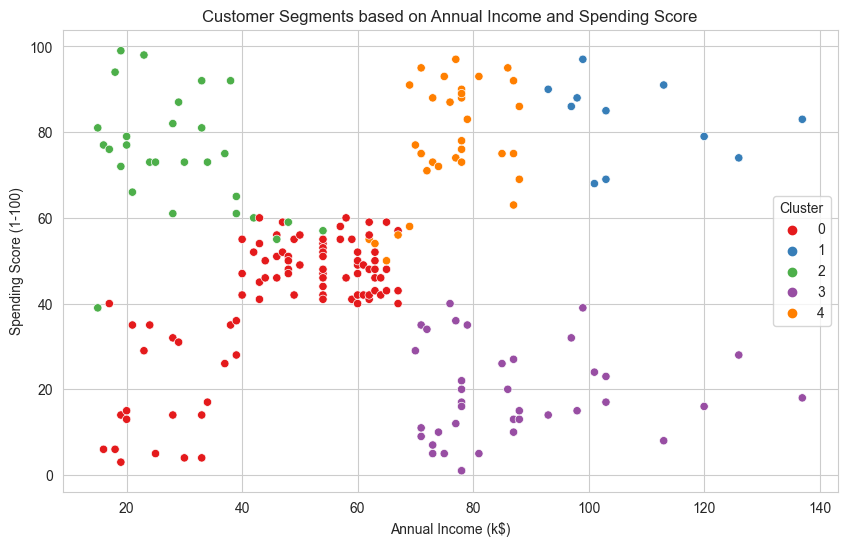

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

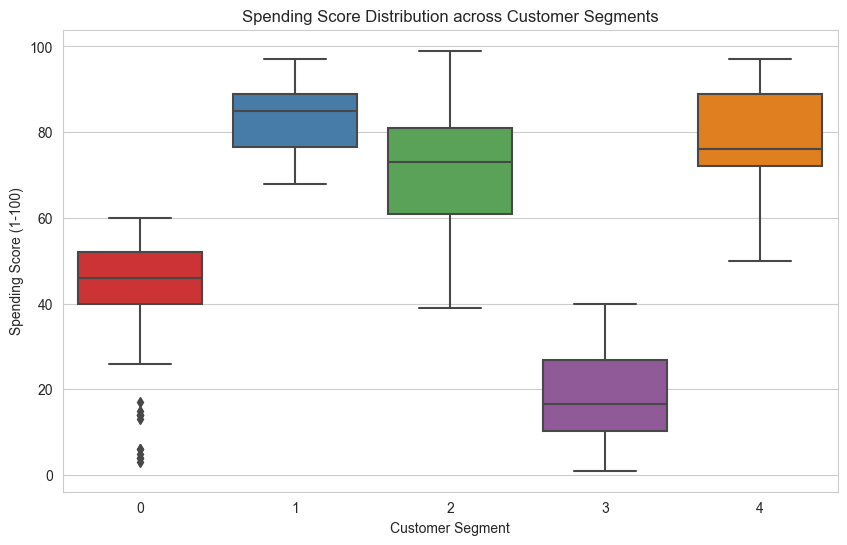

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='Set1')
plt.title('Spending Score Distribution across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Spending Score (1-100)')
plt.show()


# Task 2

In [28]:
# Project 2: Sales Performance Dashboard
# Dataset

# Sales data including regions, sales reps, products, and monthly sales figures. Download a suitable dataset from Kaggle, such as the Superstore Dataset.

# Visualization Goals

# Compare sales performance across regions.
# Track sales trends over time.

import pandas as pd
df=pd.read_csv("superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


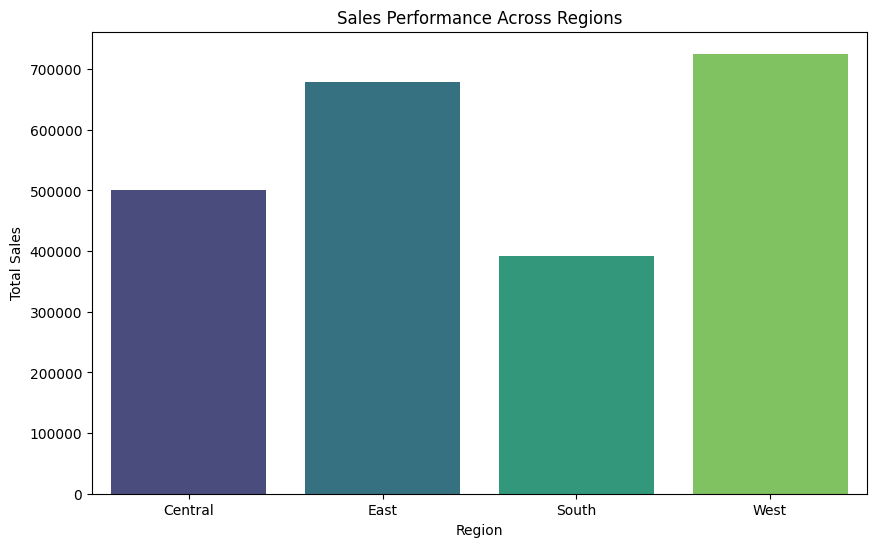

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

region_sales = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='Region', y='Sales', palette='viridis')
plt.title('Sales Performance Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [31]:
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(df=monthly_sales, x='YearMonth', y='Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


ValueError: Could not interpret value `YearMonth` for parameter `x`

<Figure size 1200x600 with 0 Axes>

# Task 3

In [32]:
# Health Metrics Analysis
# Dataset

# Health metrics data including patient records, treatments, outcomes, and demographics. Download a suitable dataset from Kaggle, such as the Heart Disease Dataset.

# Visualization Goals

# Analyze the distribution of various health metrics.
# Identify correlations between different health parameters.
# Visualize patient outcomes across different demographic groups.

import pandas as pd
 
df=pd.read_csv("heartdisease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


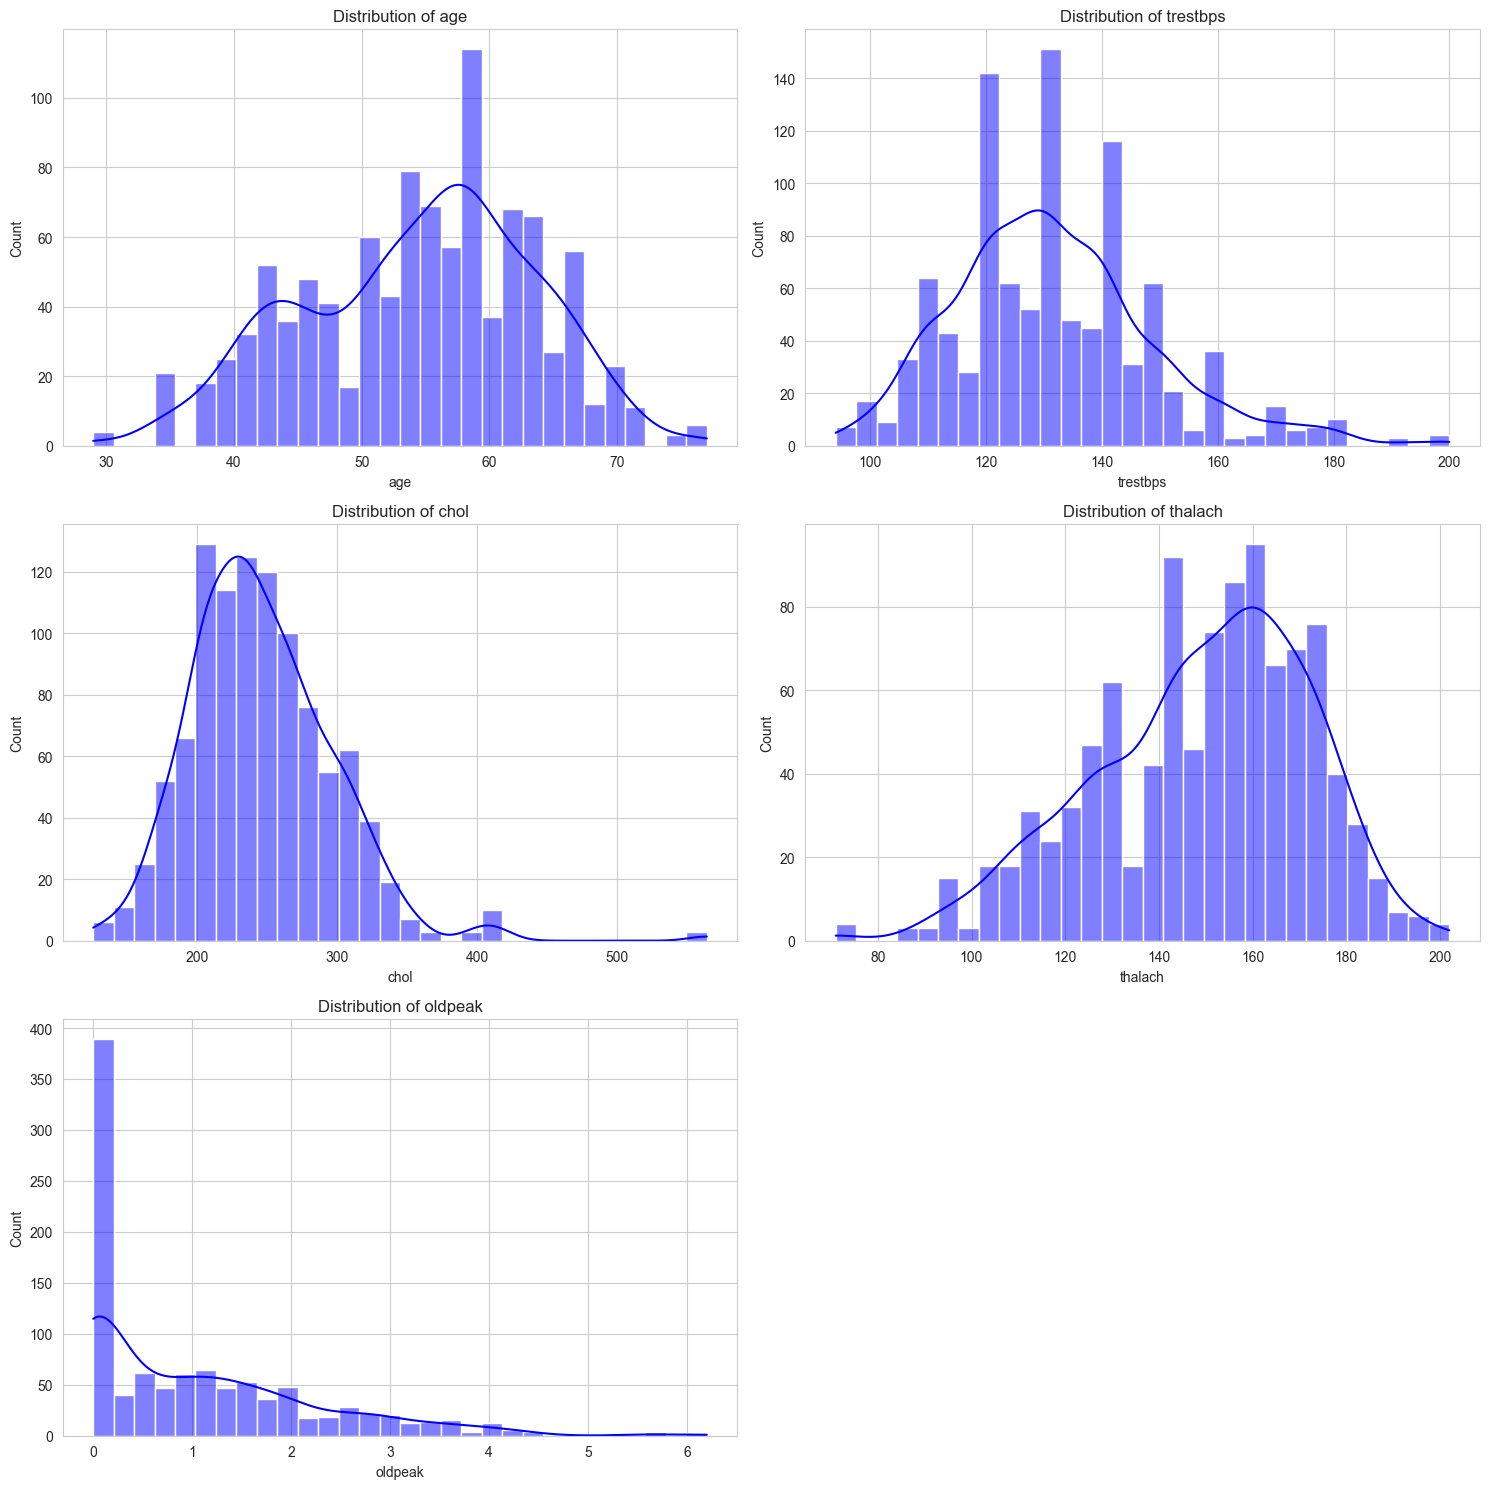

In [33]:
sns.set_style("whitegrid")

columns_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i], color='blue', bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

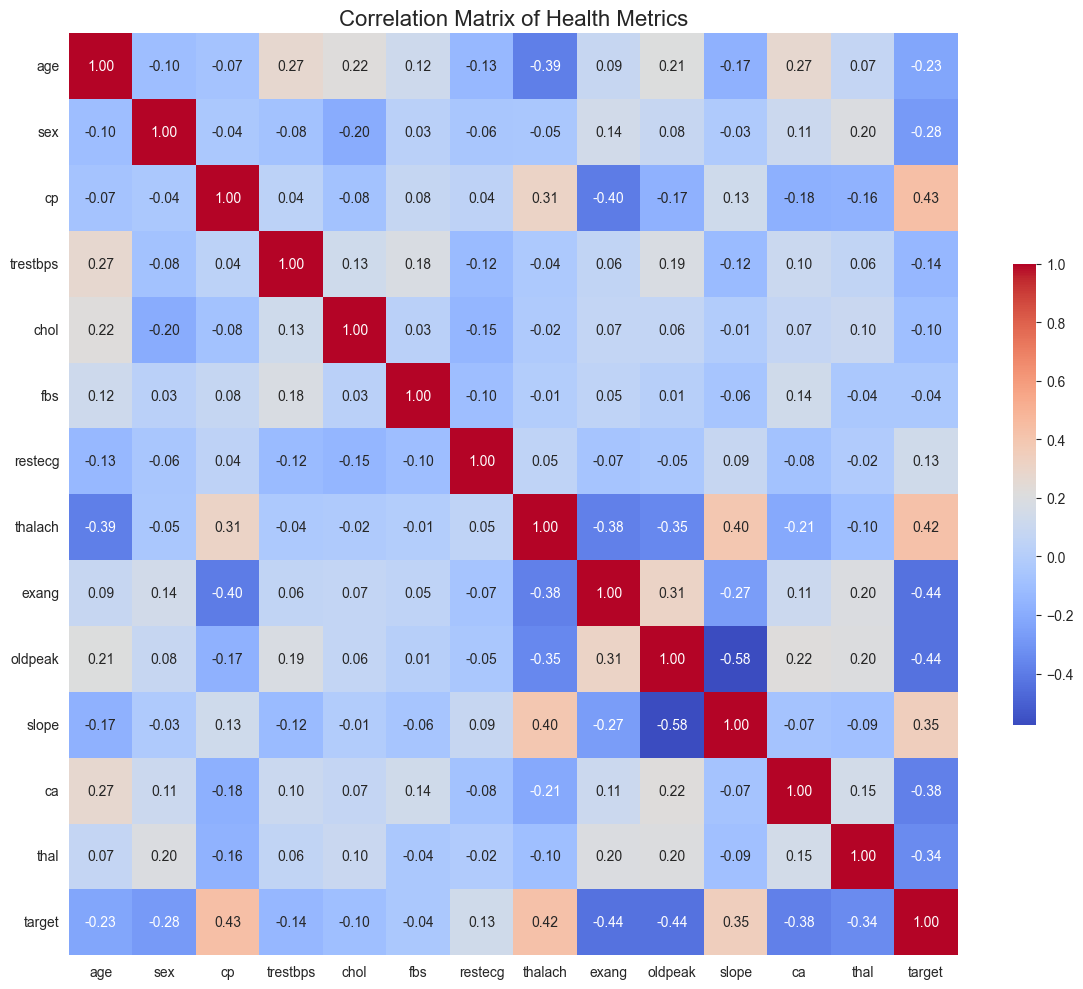

In [34]:
plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})

plt.title('Correlation Matrix of Health Metrics', fontsize=16)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

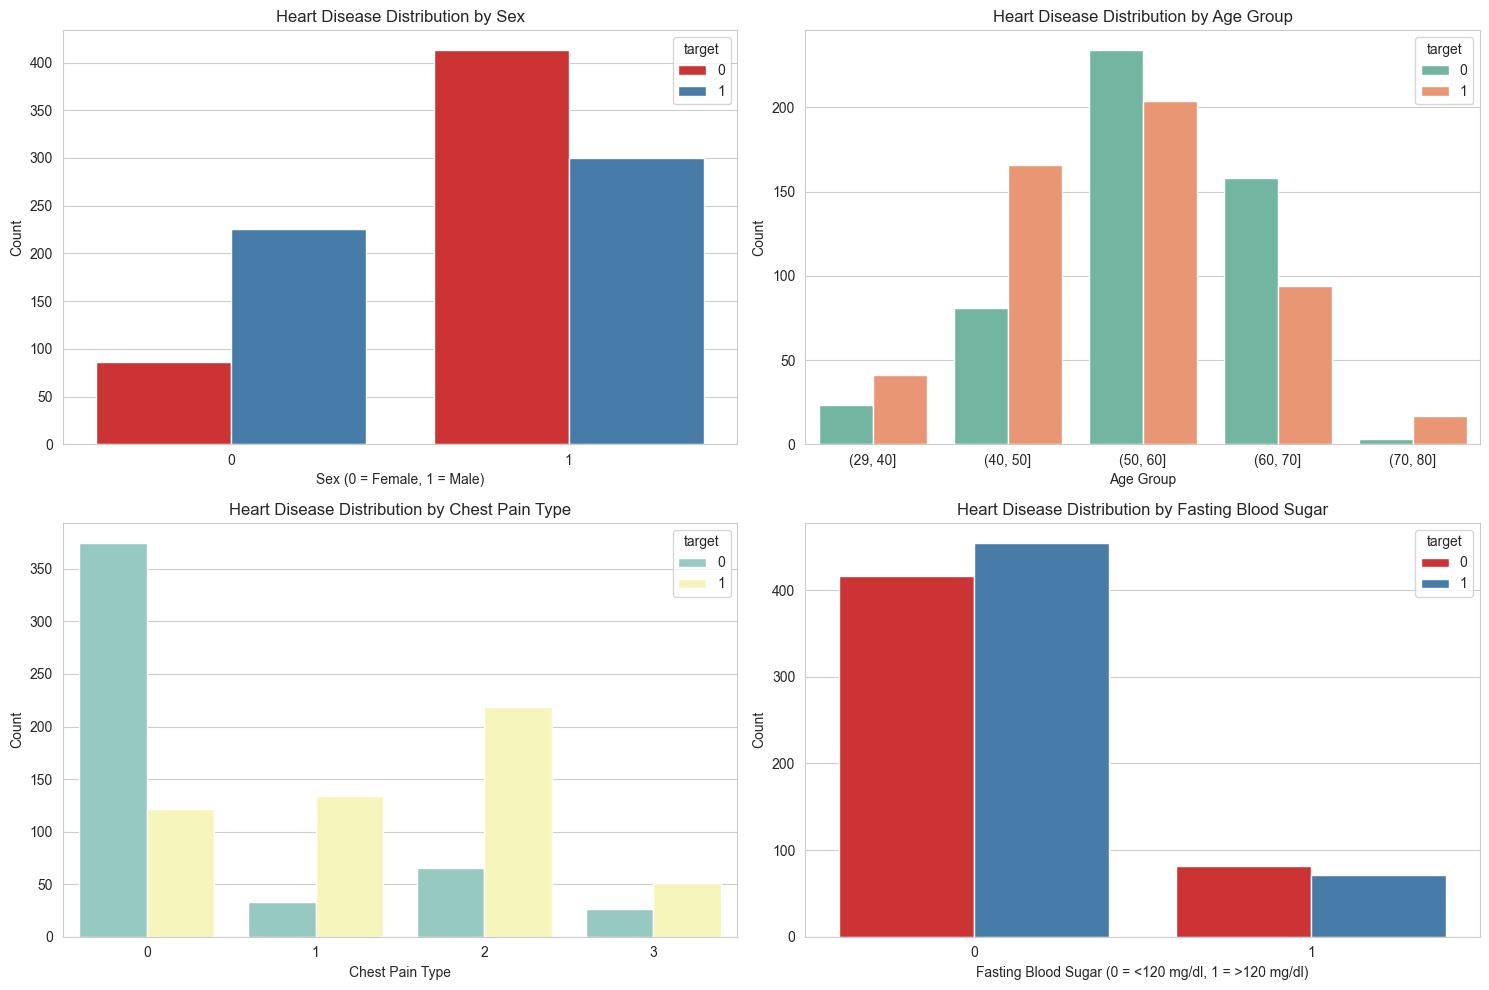

In [35]:

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.countplot(x='sex', hue='target', data=df, ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Heart Disease Distribution by Sex')
axes[0, 0].set_xlabel('Sex (0 = Female, 1 = Male)')
axes[0, 0].set_ylabel('Count')

age_bins = [29, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins)
sns.countplot(x='age_group', hue='target', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Heart Disease Distribution by Age Group')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='cp', hue='target', data=df, ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('Heart Disease Distribution by Chest Pain Type')
axes[1, 0].set_xlabel('Chest Pain Type')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='fbs', hue='target', data=df, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('Heart Disease Distribution by Fasting Blood Sugar')
axes[1, 1].set_xlabel('Fasting Blood Sugar (0 = <120 mg/dl, 1 = >120 mg/dl)')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Task 4

In [ ]:
# Project 4: Data Science Job Salaries Analysis
# Dataset

# Data on job salaries for data science positions across different years. A suitable dataset is the Data Science Job Salaries Dataset from Kaggle.

# Visualization Goals

# Analyze trends in data science salaries over different years.
# Compare salary distributions across various job titles.
# Visualize the impact of experience and location on salaries.

import pandas as pd
df = pd.read_csv("data_science_salaries.csv")
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='salary_in_usd', data=df, estimator='mean', ci=None)
plt.title('Average Data Science Salaries Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.show()


In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(y='salary_in_usd', x='job_title', data=df)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Impact of Experience Level on Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
top_locations = df['company_location'].value_counts().head(10).index
sns.boxplot(y='salary_in_usd',x='company_location', data=df[df['company_location'].isin(top_locations)])
plt.title('Impact of Company Location on Salaries (Top 10 Locations)')
plt.xlabel('Salary in USD')
plt.ylabel('Company Location')
plt.tight_layout()
plt.show()
